In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Let's create synthetic data points

from sklearn.datasets import make_classification

In [3]:
X,y= make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0,random_state=10)

In [4]:
pd.DataFrame(X)

,0,1
0,-0.541855,0.057208
1,1.662027,-0.727590
2,0.948612,-0.982990
3,1.634751,1.600342
4,-1.770307,-2.189778
...,...,...
995,2.616800,2.240396
996,2.292522,1.410692
997,0.290327,-0.053784
998,-0.855777,0.064193


In [5]:
pd.DataFrame(y)

,0
0,0
1,1
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,1


<Axes: xlabel='0', ylabel='1'>

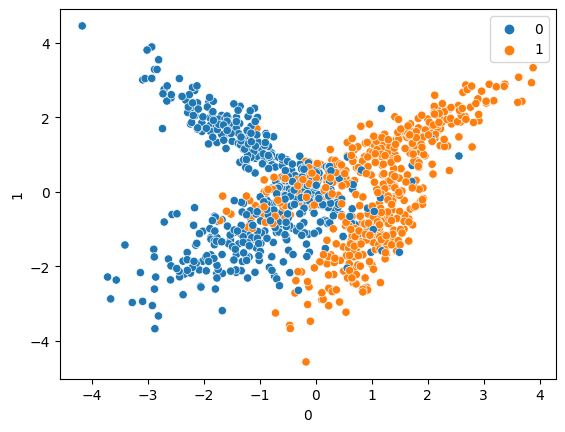

In [6]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [7]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

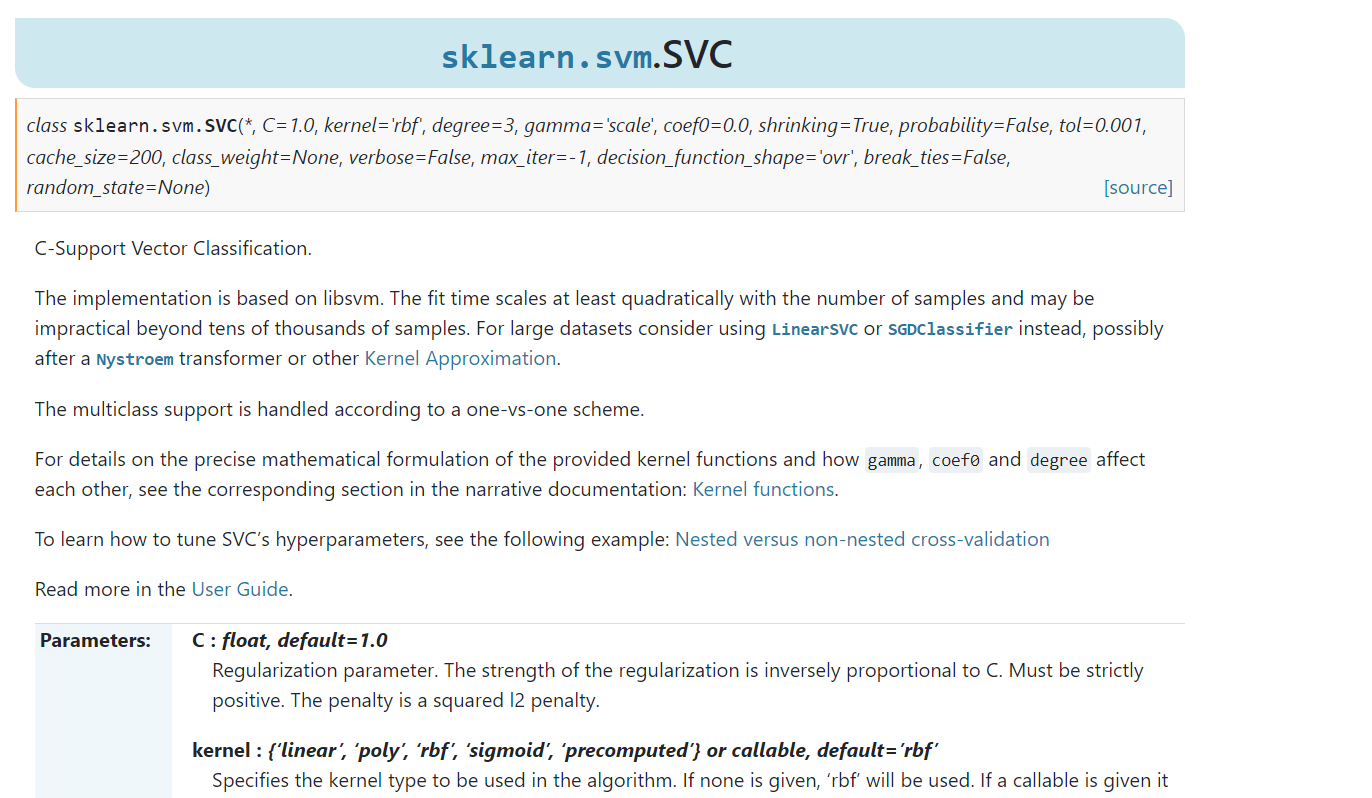

In [8]:
from sklearn.svm import SVC

In [9]:
svc= SVC(kernel="linear") # kernal =["poly","rbf","sigmoid"] --> these are belongs to SVM kernals
# we will learn SVM Kernals later

In [10]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [11]:
svc.coef_ # we have 2 features so we have two slope coefficients

array([[ 1.4580998 , -0.24529317]])

In [12]:
# prediction

y_pred=svc.predict(X_test)

In [13]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
accuracy_score(y_pred,y_test)

0.8878787878787879

In [16]:
confusion_matrix(y_test,y_pred)

array([[151,  14],
       [ 23, 142]], dtype=int64)

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       165
           1       0.91      0.86      0.88       165

    accuracy                           0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.89      0.89      0.89       330



## Hyperparameter tuning in SVC

In [18]:
from sklearn.model_selection import GridSearchCV

svc1= SVC(kernel="linear")

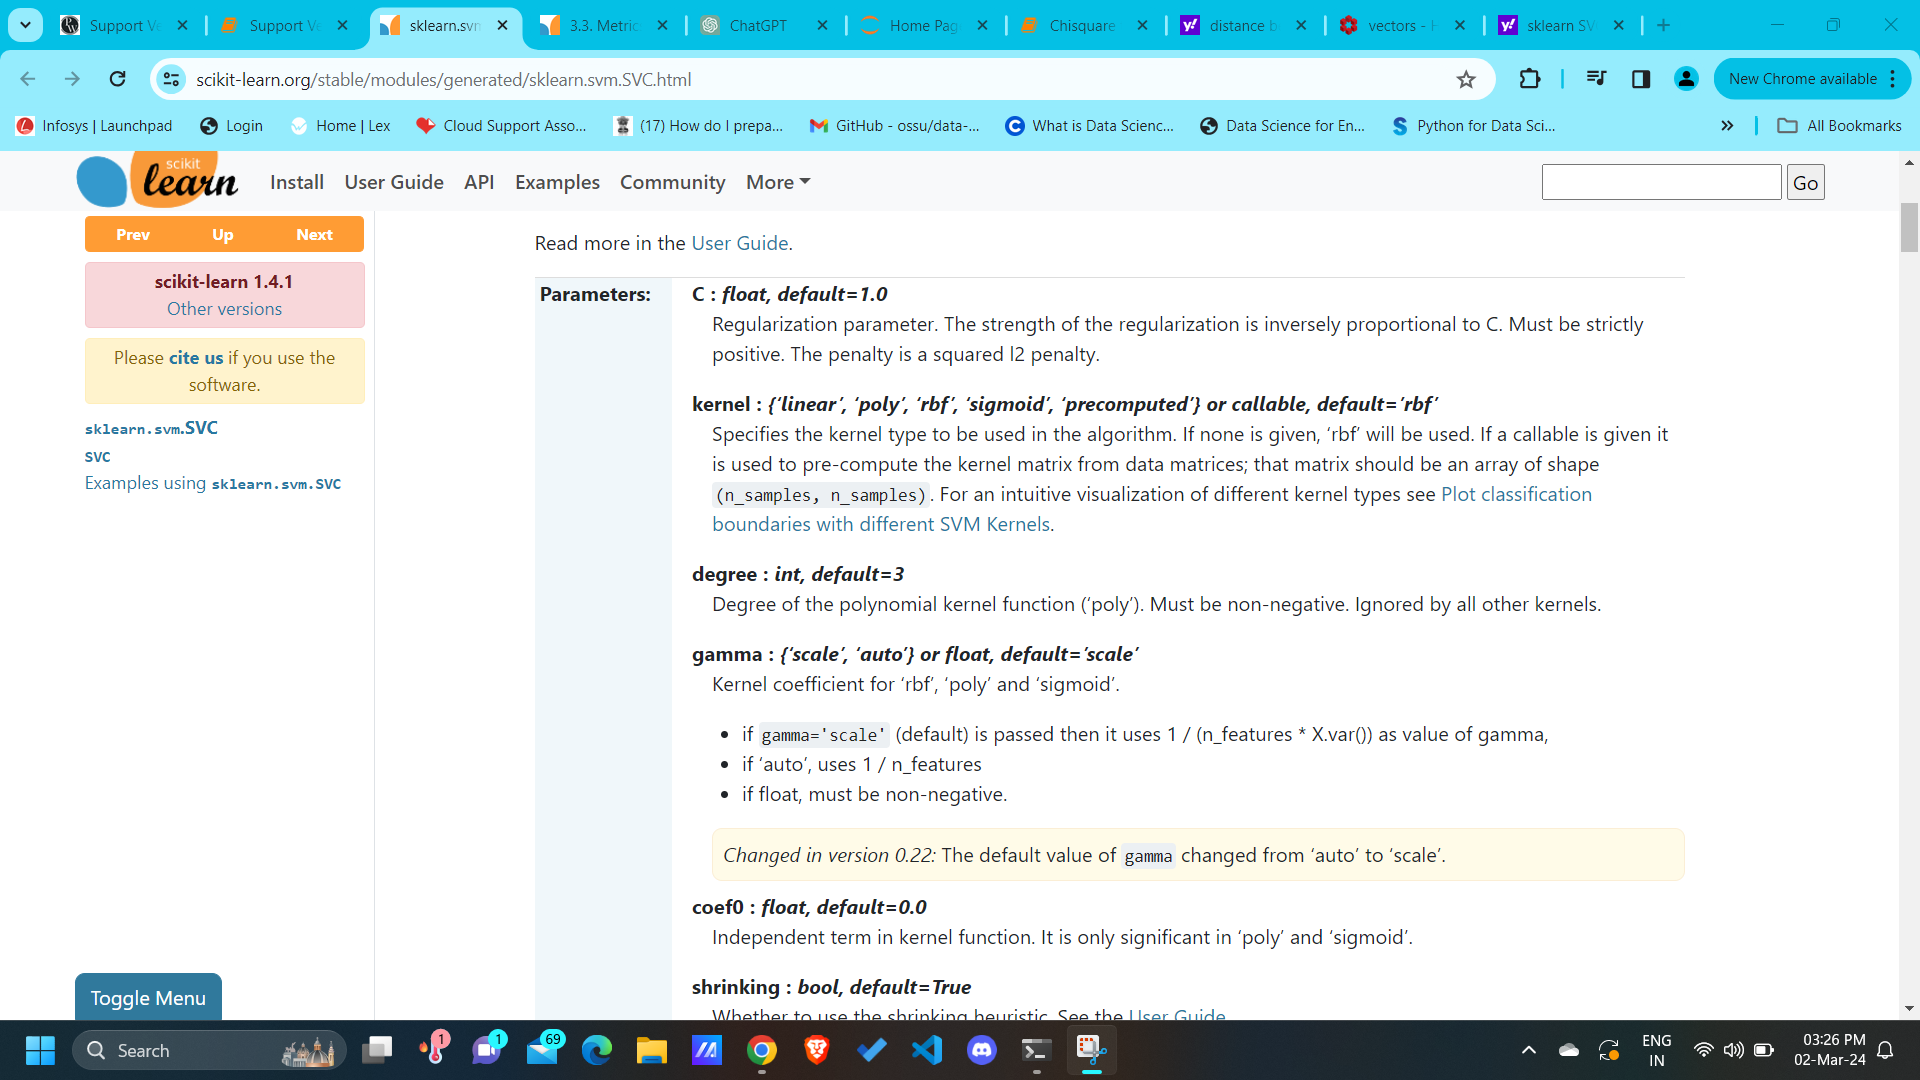

In [19]:
parameters={"C":[0,0.1,0.5,1,1.5,2,3,4,5,6,7,8,9,10,100,1000],"kernel":["linear"],"gamma":[1.0,2.0,3.0,4.0]}

# we consider kernal=linear only, the remaining values like rbf, poly, sigmoid belongs to the SVM kernals

In [20]:
gsv=GridSearchCV(estimator=svc1, param_grid=parameters,cv=5,scoring="accuracy",verbose=3)

In [21]:
gsv.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END .......C=0, gamma=1.0, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .......C=0, gamma=1.0, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END .......C=0, gamma=1.0, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END .......C=0, gamma=1.0, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END .......C=0, gamma=1.0, kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END .......C=0, gamma=2.0, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .......C=0, gamma=2.0, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END .......C=0, gamma=2.0, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END .......C=0, gamma=2.0, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END .......C=0, gamma=2.0, kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END .......C=0, gamma=3.0, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .......C=0, gamma=3.0, kernel=line

C:\Users\Nethajimahendra K\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nethajimahendra K\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nethajimahendra K\Anaconda\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Nethajimahendra K\Anaconda\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0, 0.1, 0.5, 1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                               100, 1000],
                         'gamma': [1.0, 2.0, 3.0, 4.0], 'kernel': ['linear']},
             scoring='accuracy', verbose=3)

In [22]:
gsv.best_estimator_

SVC(C=5, gamma=1.0, kernel='linear')

In [23]:
gsv.best_params_

{'C': 5, 'gamma': 1.0, 'kernel': 'linear'}

In [24]:
## let's build new model with above hyperparameters # {'C': 5, 'gamma': 1.0, 'kernel': 'linear'}

model= SVC(C=5, gamma=1.0, kernel="linear")

In [25]:
model.fit(X_train,y_train)

SVC(C=5, gamma=1.0, kernel='linear')

In [26]:
y_pred_model=model.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred_model)

0.8878787878787879

In [28]:
print(confusion_matrix(y_test,y_pred_model))

[[151  14]
 [ 23 142]]


In [29]:
print(classification_report(y_pred_model,y_test))

# precision is improved as compared to earlier

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       174
           1       0.86      0.91      0.88       156

    accuracy                           0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.89      0.89      0.89       330

